In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [14]:
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [ ]:
def calculate_bmi(state: BMIState):
    bmi = state["weight_kg"] / (state["height_m"] ** 2)
    return {"bmi": round(bmi, 2)}
    

In [ ]:
def calculate_bmi_category(state: BMIState):
    bmi = state.get("bmi")
    if bmi is None:
        raise ValueError("BMI must be calculated before category")

    if bmi < 18.5:
        category = "Underweight"
    elif bmi < 25:
        category = "Normal weight"
    elif bmi < 30:
        category = "Overweight"
    else:
        category = "Obesity"

    return {"category": category}

In [20]:
graph = StateGraph(BMIState)

graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('calculate_bmi_category', calculate_bmi_category)


graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'calculate_bmi_category')
graph.add_edge('calculate_bmi_category', END)

workflow = graph.compile()

In [25]:
initial_state: BMIState = {
    'weight_kg': 70,
    'height_m': 1.75
}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


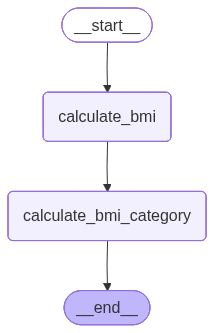

In [26]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())